# `Astropy` models and fitting
If you need to do least square fitting for data to a model a good place to start is `astropy`'s modeling and fitting code.

## Packages being used
+ `astropy`: for modeling and fitting
+ `matplotlib`: for plotting

## Relevant documentation
+ `astropy`: http://docs.astropy.org/en/stable/modeling/index.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import mpl_style
%matplotlib inline
plt.style.use(mpl_style.style1)

## 1-D model fitting
For an example lets look at the problem of fitting a 1-D model to a spectral line.  First we need to create some fake data:

In [2]:
x = np.linspace(-5., 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)

### A trapezoid model

In [3]:
t_init = models.Trapezoid1D(amplitude=1.0, x_0=0.1, slope=0.5)
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y)
print(t)

Model: Trapezoid1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             x_0                width              slope       
    ------------------ ------------------ ------------------- ------------------
    3.0803249716454713 1.3044080734752705 0.19424400621933244 1.7927316237356885


### A Gaussian model

In [4]:
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)
print(g)

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude            mean              stddev      
    ----------------- ------------------ ------------------
    3.000747157348881 1.2969418885855362 0.7996586547245912


### Plotting the results

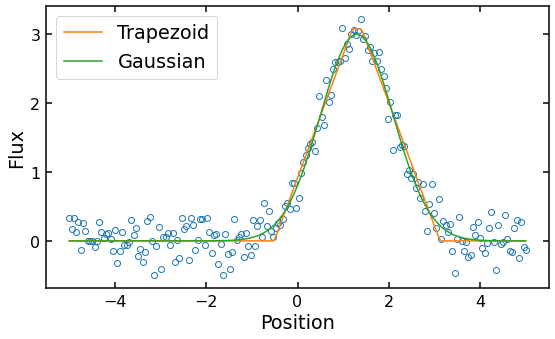

In [5]:
plt.figure(1, figsize=(8,5))
plt.plot(x, y, 'o', mfc='none')
plt.plot(x, t(x), label='Trapezoid')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)
plt.tight_layout()

## Compound models
Models can also be 'added' together before fitting.  To demonstrate lets make a new dataset made up to two Gaussians.

In [6]:
np.random.seed(42)
g1 = models.Gaussian1D(1, 0, 0.2)
g2 = models.Gaussian1D(2.5, 0.5, 0.1)
x = np.linspace(-1, 1, 200)
y = g1(x) + g2(x) + np.random.normal(0., 0.2, x.shape)

### Make the model
The model can be 'added' just like arrays:

In [7]:
gg_init = models.Gaussian1D(1, 0, 0.1) + models.Gaussian1D(2, 0.5, 0.1)
fit_gg = fitting.SLSQPLSQFitter()
gg = fit_gg(gg_init, x, y)
print(gg)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 6.832859352651364
            Iterations: 15
            Function evaluations: 128
            Gradient evaluations: 15
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1]
Components: 
    [0]: <Gaussian1D(amplitude=0.98118974, mean=0.00597661, stddev=0.20738563)>

    [1]: <Gaussian1D(amplitude=2.48566491, mean=0.5041208, stddev=0.10000035)>
Parameters:
       amplitude_0            mean_0        ...       stddev_1     
    ------------------ -------------------- ... -------------------
    0.9811897362310932 0.005976606899196926 ... 0.10000035342588433


/mnt/lustre/shared_python_environment/DataLanguages/lib/python3.8/site-packages/scipy/optimize/optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


### Plot the result

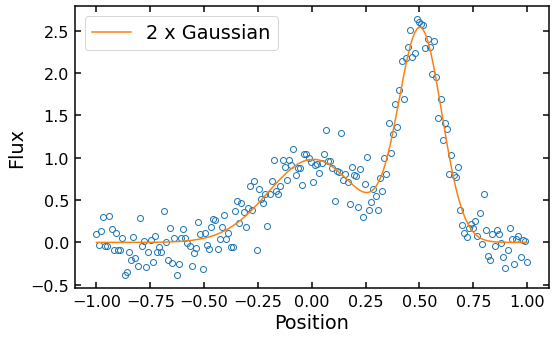

In [8]:
plt.figure(2, figsize=(8, 5))
plt.plot(x, y, 'o', mfc='none')
plt.plot(x, gg(x), label='2 x Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)
plt.tight_layout()

## `Astropy`'s models
`Astropy` has a large number of 1- and 2-D models built in.  Check out https://docs.astropy.org/en/stable/modeling/index.html#module-astropy.modeling.functional_models for a full list.  If the model you are looking for is not built in, you can always define your own: https://docs.astropy.org/en/stable/modeling/new-model.html.

## Limitations
+ Uses OLS (or similar) to maximize an objective function (and all the assumptions about the data that go into this, e.g. Gaussian errors)
+ Cov of fit only returned for some fitters (fond on the `fitter.fit_info()` method)